# Initial visualization of IMERG monthly data
## Dataset
GPM IMERG Final Precipitation L3 1 month 0.1 degree x 0.1 degree V07 (GPM_3IMERGM) at GES DISC:
[data](https://search.earthdata.nasa.gov/search/granules?p=C2723754851-GES_DISC&pg[0][v]=f&pg[0][qt]=2018-01-01T00%3A00%3A00.000Z%2C&pg[0][gsk]=-start_date&as[platforms][0]=Other%3AModels%3AMerged%20Analysis%3AIMERG&tl=1694036563!3!!&fpc0=Models&fpsc0=Merged%20Analysis&fps0=IMERG&fpb0=Other) from NASA Earthdata. [GSFC documentation](https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGM_07/summary) and [GPM documentation](https://gpm.nasa.gov/sites/default/files/2023-07/IMERG_V07_ReleaseNotes_final_230713.pdf)

## Environments and packages


## Load packages and filenames

In [1]:
import numpy as np
import xarray as xr
import h5py
import os
import matplotlib.pyplot as plt

In [1]:
func_dir = '/global/home/users/ann_scheliga/CYGNSS-GRACE/codebase/'
import sys
sys.path.append(func_dir)
import load_data
test = load_data.load_IMERG()
test

<xarray.DataArray (time: 64, lat: 1800, lon: 3600)>
[414720000 values with dtype=float64]
Coordinates:
  * time     (time) float64 1.199e+09 1.201e+09 ... 1.362e+09 1.364e+09
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 -179.9 -179.9 -179.8 -179.6 ... 179.8 179.8 179.9

## Load IMERG from scratch
Creates .nc file read in load_data.py function `load_IMERG()`

In [2]:
# Grab all filenames
imerg_filepath = '/global/scratch/users/ann_scheliga/IMERG_monthly_data/'

all_fnames = os.listdir(imerg_filepath)
fnames = [fname for fname in all_fnames if fname.endswith('.HDF5')]
fnames.sort()
print(fnames[0] , fnames[-1])

3B-MO.MS.MRG.3IMERG.20180101-S000000-E235959.01.V07A.HDF5 3B-MO.MS.MRG.3IMERG.20230401-S000000-E235959.04.V07A.HDF5


In [3]:
# Read precip data into single np.array

n_months = len(fnames)
# Create empty np.array for precip
precip_array = np.zeros(shape = (n_months , 1800 , 3600))
# Create empty np_array for time values
time_array = np.zeros(shape= n_months)

# iterate through files
for idx , fname in enumerate(fnames):
    f = h5py.File(imerg_filepath + fname,'r')  
    # break loop if current lat/lon do not match previous iterations'
    if idx > 0:
        assert (f['Grid']['lat'][:] == prev_lat).all() , f"{fname} does not match prev lat indices"
        assert (f['Grid']['lon'][:] == prev_lon).all() , f"{fname} does not match prev lon indices"
    
    precip = f['Grid']['precipitation'][:].T.squeeze()
    # negative values to nan
    precip[precip<0] = np.nan
    # Add precip to array
    precip_array[idx,:] = precip
    # Add time to time_array
    time_array[idx] = f['Grid']['time'][0]
    # Move current lat/lon to previous lat/lon
    prev_lat = f['Grid']['lat'][:]
    prev_lon = f['Grid']['lon'][:]

In [4]:
# Create xr.DataArray from np.array of precip
xr_IMERG = xr.DataArray(
    precip_array,
    coords = {
        "time":time_array,
        "lat": prev_lat,
        "lon": prev_lon
    },
    dims = ['time','lat','lon']
)
xr_IMERG

<xarray.DataArray (time: 64, lat: 1800, lon: 3600)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) float64 1.199e+09 1.201e+09 ... 1.362e+09 1.364e+09
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 -179.9 -179.9 -179.8 -179.6 ... 179.8 179.8 179.9

In [5]:
# Save DataArray
# xr_IMERG.to_netcdf(imerg_filepath+'IMERG_allmonths_201801_202304_xr.nc')

## Working tests and code

In [3]:
test_filename = '3B-MO.MS.MRG.3IMERG.20180101-S000000-E235959.01.V07A.HDF5'
imerg_filepath = '/global/scratch/users/ann_scheliga/IMERG_monthly_data/'
func_dir = '/global/home/users/ann_scheliga/CYGNSS-GRACE/codebase/'

In [4]:
# Loads 1 month, global data
f = h5py.File(imerg_filepath + test_filename,'r')  

In [10]:
print('Level 1 keys:',f.keys())
print('Level 2 keys:',f['Grid'].keys())

Level 1 keys: <KeysViewHDF5 ['Grid']>
Level 2 keys: <KeysViewHDF5 ['nv', 'lonv', 'latv', 'time', 'lon', 'lat', 'time_bnds', 'lon_bnds', 'lat_bnds', 'precipitation', 'randomError', 'gaugeRelativeWeighting', 'probabilityLiquidPrecipitation', 'precipitationQualityIndex']>


**Description of keys**

*nv* , *lonv* , *latv* : tuples of (0 , 0). I don't know their purpose

*time* : start time of file, seconds since 1980-01-06 00:00:00 UTC\
*time_bnds* : start and end time of file in same unit as *time*

*lon*, *lat*: center of each pixel\
*lon_bnds* , *lat_bnds*: edges of each pixel

In [108]:
# Timeframe
time_bnds = f['Grid']['time_bnds'][0][:]
print(time_bnds)

1198800000


In [71]:
# Grabbing lat and lon
lon_var = f['Grid']['lon'][:]
lat_var = f['Grid']['lat'][:]
lat_grid , lon_grid = np.meshgrid(lat_var,lon_var)

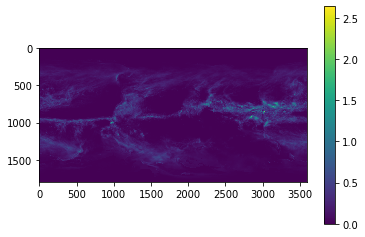

In [81]:
# Plot precipitation values
test = f['Grid']['precipitation'][:].T.squeeze()
test[test<0] = np.nan
plt.imshow(test)
plt.colorbar()

## Scratch work and loose ends